In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
# import cv2
import pandas as pd
from PIL import Image, ImageFilter

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf

Using TensorFlow backend.


In [2]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" #for GPU Support on MacBook
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

1.13.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11446913673971943485
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10639949738396789308
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [5]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [6]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [7]:
x_trainDir = trainDir
x_testDir = testDir

In [8]:
x_trainDir

'C:\\Users\\tanho\\Downloads\\Aaron-Workspace\\FilteredImages\\train'

In [9]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList
        
        
#         for img in images
    
# for folder in toProcessList:
#     images = os.listdir(datasetDir + "/" + folder)
#     folderName = folder.split('_')
# #     print(folderName[0])
#     if folderName[0] in listOfTrainingName:
#         trainingFolders.append(datasetDir + "/" + folder)
# #         print(folderName)
#         index = listOfTrainingName.index(folderName[0])
#         temp = listOfTraining[index]
#         x_train.append(images)
#         tempBList = []
#         val = temp[1]
#         tempBList.append(val)
#         y_train.append(tempBList)
#         #temp.append(images)
#         #trainingSet.append(temp)
#     else:
#         testFolders.append(datasetDir + "/" + folder)
#         testSet.append(images)

trainingImagesDir = getImagesDir(trainDir)
testImagesDir = getImagesDir(testDir)
# np.array(trainingImages).shape

In [10]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            myImages.append(np.array(Image.open(image)))
        myFolder.append(np.array(myImages))
    return myFolder


#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [11]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [12]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [13]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [14]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test


npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 1000, 1)

In [15]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []
# y_neg_v = []
# pos_v = []
# y_pos_v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v


np_v = np.array(v)
# npY_test = np.array(Y_test)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 1000, 1)

In [16]:
npX = np.array(X)
npY = np.array(Y)

In [17]:
print(npX.shape)
print(npY.shape)

(4591, 101, 1000)
(4591,)


In [18]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)

In [19]:
print(newNPX.shape)

(4591, 101, 1000, 1)


In [20]:
# print(trainingImagesNP)

In [21]:
# input_shape = (101, 1000, 3)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()

In [22]:
# from keras.preprocessing.image import ImageDataGenerator

In [23]:
#Saving Model
from keras.callbacks import ModelCheckpoint
#numEpochs = 100
numEpochs = 30
model_path = os.path.join(currentDir,'DAM-DHM-V-'+ str(numEpochs) +'.h5')

# checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=True, mode='max')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [24]:
# input_shape

In [25]:
input_shape = (101, 1000, 1)

In [26]:
# DR HARRY
from keras.callbacks import EarlyStopping

def evaluate_model(X_train, X_val, y_train, y_val):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))


    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta', #adam
                  metrics=['accuracy']) 
    
    print(model.metrics_names)
    
    model.save_weights('model.h5')
    
    callbacks = [EarlyStopping(monitor='val_acc', patience = 10)]
    
    hist=model.fit(x=X_train, y=y_train, batch_size=32, epochs=numEpochs, callbacks=callbacks_list, validation_data=(X_val, y_val))
    
    _, val_acc=model.evaluate(x=X_val, y=y_val, verbose=1)
  
    model.load_weights('model.h5')
    
    model.summary()
    
    print("acc: ", np.mean(hist.history['acc']))
    
    print("val_acc: ", val_acc)
    
    model.save(''+ str(numEpochs) +' Epoch (Dr Harry Model) w validation.h5')
    
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    return model, val_acc

Instructions for updating:
Colocations handled automatically by placer.
['loss', 'acc']
Instructions for updating:
Use tf.cast instead.
Train on 4591 samples, validate on 1740 samples
Epoch 1/30
4591/4591 [==============================] - 84s 18ms/step - loss: 4.5133 - acc: 0.7153 - val_loss: 6.6051 - val_acc: 0.5902

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4591/4591 [==============================] - 45s 10ms/step - loss: 4.5293 - acc: 0.7188 - val_loss: 6.6051 - val_acc: 0.5902

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4591/4591 [==============================] - 45s 10ms/step - loss: 4.5293 - acc: 0.7188 - val_loss: 6.6051 - val_acc: 0.5902

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4591/4591 [==============================] - 46s 10ms/step - loss: 4.5293 - acc: 0.7188 - val_loss: 6.6051 - val_acc: 0.5902

Epoch 0000

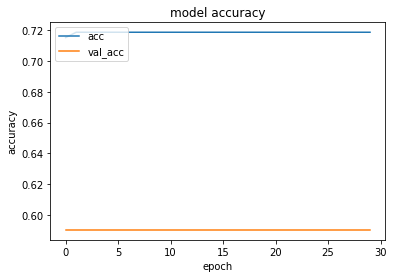

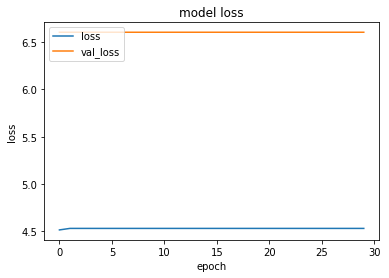

In [27]:
# run CNN model
model, val_acc = evaluate_model(newNPX, newNPX_test, npY, npY_test) 

['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 38s 9ms/step - loss: 4.5368 - acc: 0.7136 - val_loss: 4.3449 - val_acc: 0.7304

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5498 - acc: 0.7175 - val_loss: 4.3449 - val_acc: 0.7304

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5498 - acc: 0.7175 - val_loss: 4.3449 - val_acc: 0.7304

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5498 - acc: 0.7175 - val_loss: 4.3449 - val_acc: 0.7304

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [===========================

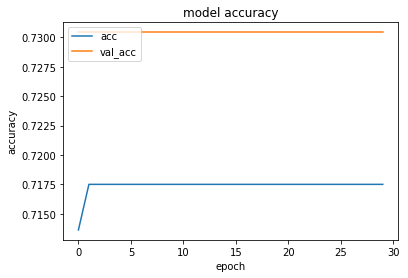

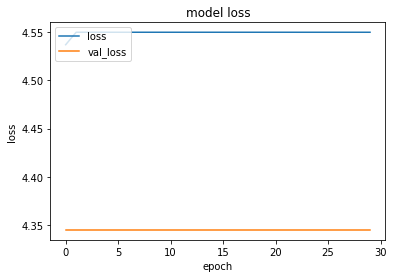

K-Fold has ran  1  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 38s 9ms/step - loss: 4.4962 - acc: 0.7190 - val_loss: 4.5902 - val_acc: 0.7152

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5225 - acc: 0.7192 - val_loss: 4.5902 - val_acc: 0.7152

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5225 - acc: 0.7192 - val_loss: 4.5902 - val_acc: 0.7152

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.5225 - acc: 0.7192 - val_loss: 4.5902 - val_acc: 0.7152

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

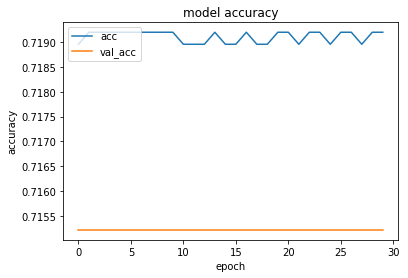

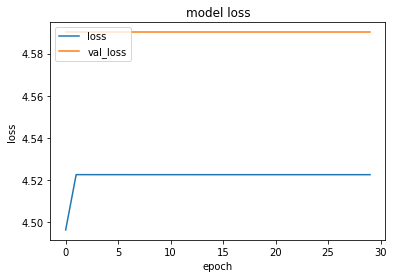

K-Fold has ran  2  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 38s 9ms/step - loss: 11.4100 - acc: 0.2810 - val_loss: 11.2636 - val_acc: 0.2935

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 37s 9ms/step - loss: 8.4733 - acc: 0.4038 - val_loss: 0.6749 - val_acc: 0.7065

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 37s 9ms/step - loss: 0.6158 - acc: 0.7158 - val_loss: 0.6067 - val_acc: 0.7065

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 37s 9ms/step - loss: 0.6075 - acc: 0.7177 - val_loss: 0.6039 - val_acc: 0.7065

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131

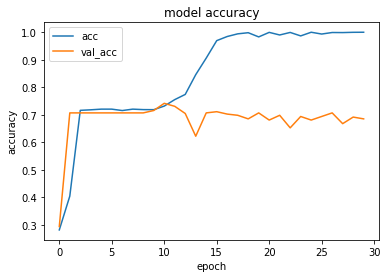

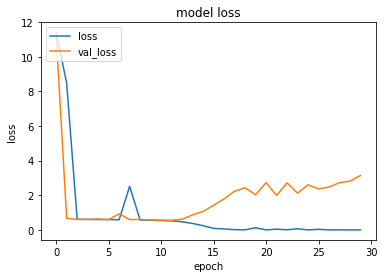

K-Fold has ran  3  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 38s 9ms/step - loss: 4.4299 - acc: 0.7197 - val_loss: 5.4311 - val_acc: 0.6630

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.4288 - acc: 0.7250 - val_loss: 5.4311 - val_acc: 0.6630

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.4288 - acc: 0.7250 - val_loss: 5.4311 - val_acc: 0.6630

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 37s 9ms/step - loss: 4.4288 - acc: 0.7250 - val_loss: 5.4311 - val_acc: 0.6630

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

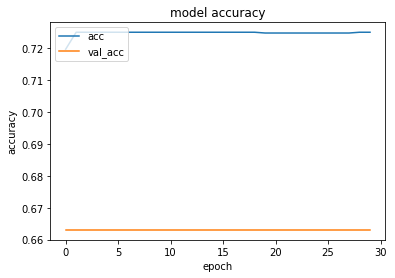

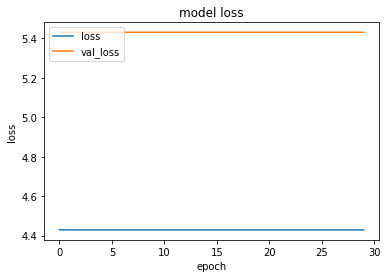

K-Fold has ran  4  time(s)

Model Accuracy after all K-Fold:  0.6983695652173914


In [28]:
# k-fold cross validation, k = n_folds

n_folds = 4
count = 0
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(newNPX, npY, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    model, test_acc = evaluate_model(X_train, X_val, y_train, y_val)
    count += 1
    cv_scores.append(test_acc)
    model_history.append(model)
    print('K-Fold has ran ', count, ' time(s)')
    
print('\nModel Accuracy after all K-Fold: ', (np.mean(cv_scores)))

In [29]:
result = model.predict(newNPX_v)
for each in result:
    print(each)

[0.9737101]
[0.9492435]
[0.96655345]
[0.96551347]
[0.98073554]
[0.96847403]
[0.98505354]
[0.9790206]
[0.97454214]
[0.9762242]
[0.96621627]
[0.9634815]
[0.9673809]
[0.953771]
[0.964795]
[0.9783826]
[0.95934147]
[0.9744133]
[0.9737857]
[0.9765427]
[0.9746275]
[0.97409177]
[0.96271765]
[0.96967083]
[0.96777886]
[0.9667648]
[0.9854708]
[0.9833405]
[0.97339475]
[0.9291625]
[0.9768487]
[0.97092015]
[0.96943146]
[0.96376467]
[0.97867775]
[0.97534764]
[0.9790524]
[0.97661126]
[0.9752817]
[0.9768106]
[0.9604752]
[0.9867131]
[0.97889197]
[0.9781065]
[0.9772912]
[0.9524466]
[0.98141104]
[0.9850609]
[0.9832058]
[0.97622013]
[0.96993494]
[0.9650965]
[0.9618246]
[0.9693265]
[0.9594622]
[0.9713236]
[0.9799212]
[0.9599391]
[0.972226]
[0.9574797]
[0.97172374]
[0.9766505]
[0.9839209]
[0.82815075]
[0.9733652]
[0.97772557]
[0.98325574]
[0.9773958]
[0.98037255]
[0.97788954]
[0.98283225]
[0.98108274]
[0.9844142]
[0.9867116]
[0.9799162]
[0.9852225]
[0.9821502]
[0.98301566]
[0.9838116]
[0.985838]
[0.9823488]


[0.94780844]
[0.93909514]
[0.9542296]
[0.9523166]
[0.9453993]
[0.95344377]
[0.94880444]
[0.9625984]
[0.96359885]
[0.9292971]
[0.94192195]
[0.9666688]
[0.9606993]
[0.9588059]
[0.9647267]
[0.92625]
[0.96000445]
[0.92263985]
[0.914043]
[0.93602765]
[0.9121698]
[0.93460536]
[0.94810975]
[0.9679229]
[0.96206343]
[0.9549798]
[0.91669583]
[0.9271463]
[0.9515703]
[0.95684266]
[0.9622539]
[0.97212636]
[0.93206835]
[0.96535575]
[0.9490142]
[0.96302986]
[0.9560313]
[0.92776775]
[0.969478]
[0.94741917]
[0.95064014]
[0.9635267]
[0.95489246]
[0.9237566]
[0.9538833]
[0.9594668]
[0.940469]
[0.9378844]
[0.9248054]
[0.9340663]
[0.93828964]
[0.9224909]
[0.92644894]
[0.9242692]
[0.9197613]
[0.93288004]
[0.95110196]
[0.9675429]
[0.9284531]
[0.9477468]
[0.95727277]
[0.9340949]
[0.96054244]
[0.9728117]
[0.92268336]
[0.9618536]
[0.9677011]
[0.93484235]
[0.9448787]
[0.96247065]
[0.9369887]
[0.9311162]
[0.9527892]
[0.93694687]
[0.9573028]
[0.94782877]
[0.9761677]
[0.91062033]
[0.9511984]
[0.965078]
[0.9512458]


In [30]:
np.mean(cv_scores)

0.6983695652173914